# Challenge Set 1:  MTA Turnstile Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime 

%matplotlib inline

#### Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [180505, 180512, 180519, 180526, 180602]
turnstiles_df = get_data(week_nums)

In [3]:
# Aside on string formatting in Python 

my_string = "Hello, {}. Are you {} to be learning {}?"
print(my_string.format("Lara", "delighted", "Python"))

Hello, Lara. Are you delighted to be learning Python?


In [4]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [5]:
# Check whether there's any formatting issues in the column names 

turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [9]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
196631,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,05:00:00,REGULAR,2907417,386872
196632,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,09:00:00,REGULAR,2907679,386878
196633,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,13:00:00,REGULAR,2908039,386884
196634,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,17:00:00,REGULAR,2908420,386887
196635,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,21:00:00,REGULAR,2908779,386895


In [10]:
# Three weeks of data
turnstiles_df.DATE.value_counts().sort_index()

04/28/2018    28099
04/29/2018    28172
04/30/2018    28259
05/01/2018    28218
05/02/2018    28176
05/03/2018    28186
05/04/2018    28092
05/05/2018    28093
05/06/2018    28046
05/07/2018    28031
05/08/2018    28168
05/09/2018    28100
05/10/2018    28053
05/11/2018    28164
05/12/2018    28103
05/13/2018    28143
05/14/2018    28118
05/15/2018    28148
05/16/2018    28191
05/17/2018    27987
05/18/2018    28043
05/19/2018    28060
05/20/2018    28267
05/21/2018    28069
05/22/2018    28325
05/23/2018    28131
05/24/2018    28315
05/25/2018    29007
05/26/2018    28075
05/27/2018    28135
05/28/2018    28090
05/29/2018    28112
05/30/2018    28014
05/31/2018    28108
06/01/2018    28102
Name: DATE, dtype: int64


#### Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [11]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [13]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [14]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
190682,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/28/2018,00:00:00,REGULAR,13761880,3042268,2018-04-28 00:00:00
190683,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/28/2018,04:00:00,REGULAR,13761896,3042287,2018-04-28 04:00:00
190684,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/28/2018,08:00:00,REGULAR,13762114,3042323,2018-04-28 08:00:00
190685,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/28/2018,12:00:00,REGULAR,13762651,3042424,2018-04-28 12:00:00
190686,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/28/2018,16:00:00,REGULAR,13763096,3042599,2018-04-28 16:00:00


In [15]:
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  
 .ENTRIES.count()
 .reset_index() # or use as_index = False; otherwise makes groupby columns new index 
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
615668,R101,R001,02-00-05,SOUTH FERRY,2018-05-23 09:00:00,2
615038,R101,R001,02-00-02,SOUTH FERRY,2018-05-23 09:00:00,2
614618,R101,R001,02-00-00,SOUTH FERRY,2018-05-23 09:00:00,2
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
656937,R143,R032,02-00-01,TIMES SQ-42 ST,2018-05-14 00:00:00,1


In [16]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME


* Looks to be a incorrect AUD entry.  May be we should just select the Regular one.

In [17]:
turnstiles_df.DESC.value_counts()

REGULAR       982768
RECOVR AUD      2632
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [18]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [19]:
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
657012,R143,R032,02-00-01,TIMES SQ-42 ST,2018-05-26 12:00:00,1
656924,R143,R032,02-00-01,TIMES SQ-42 ST,2018-05-11 20:00:00,1
656925,R143,R032,02-00-01,TIMES SQ-42 ST,2018-05-12 00:00:00,1
656926,R143,R032,02-00-01,TIMES SQ-42 ST,2018-05-12 04:00:00,1


* No more duplicate Entries

In [20]:
# Drop Exits and Desc columns.  To prevent errors in multiple run of cell, 
# errors on drop is ignored (e.g. if some columns were dropped already)
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [21]:
turnstiles_df.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
ENTRIES               int64
DATE_TIME    datetime64[ns]
dtype: object

#### Exercise 1.3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [22]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [23]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2018,6599456
1,A002,R051,02-00-00,59 ST,04/29/2018,6600050
2,A002,R051,02-00-00,59 ST,04/30/2018,6601584
3,A002,R051,02-00-00,59 ST,05/01/2018,6603075
4,A002,R051,02-00-00,59 ST,05/02/2018,6604584


In [24]:
# .groupby returns a group object whose values are the index values belonging to that group

#turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"]).groups

In [25]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
# transform() takes a function as parameter
# shift moves the index by the number of periods given (positive or negative)

In [26]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2018,6599456,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/29/2018,6600050,04/28/2018,6599456.0
2,A002,R051,02-00-00,59 ST,04/30/2018,6601584,04/29/2018,6600050.0
3,A002,R051,02-00-00,59 ST,05/01/2018,6603075,04/30/2018,6601584.0
4,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0


In [27]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
164408,TRAM2,R469,00-03-01,RIT-ROOSEVELT,05/28/2018,2903311,05/27/2018,2901675.0
164409,TRAM2,R469,00-03-01,RIT-ROOSEVELT,05/29/2018,2904849,05/28/2018,2903311.0
164410,TRAM2,R469,00-03-01,RIT-ROOSEVELT,05/30/2018,2906246,05/29/2018,2904849.0
164411,TRAM2,R469,00-03-01,RIT-ROOSEVELT,05/31/2018,2907346,05/30/2018,2906246.0
164412,TRAM2,R469,00-03-01,RIT-ROOSEVELT,06/01/2018,2908779,05/31/2018,2907346.0


In [28]:
# Drop the rows for first date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# axis = 0 means index (=1 means column)

In [29]:
# let's check that the number of entries for today is higher than entries for yesterday
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1167,A010,R080,00-00-07,57 ST-7 AV,05/10/2018,2222,05/09/2018,29160757.0
1191,A011,R080,01-00-00,57 ST-7 AV,04/29/2018,885933166,04/28/2018,885935370.0
1192,A011,R080,01-00-00,57 ST-7 AV,04/30/2018,885930410,04/29/2018,885933166.0
1193,A011,R080,01-00-00,57 ST-7 AV,05/01/2018,885929999,04/30/2018,885930410.0
1194,A011,R080,01-00-00,57 ST-7 AV,05/02/2018,885929679,05/01/2018,885929999.0


In [30]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date())) 
# datetime is both name of module and name of constructor of datetime object
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME


* Counter working in Reverse??? - WHHHAT

In [31]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size()) # size() behaves same as if we'd done .DATE.count() 

C/A    UNIT  SCP       STATION        
A010   R080  00-00-07  57 ST-7 AV          1
A011   R080  01-00-00  57 ST-7 AV         34
A025   R023  01-03-01  34 ST-HERALD SQ    34
             01-03-02  34 ST-HERALD SQ    34
A033   R170  02-06-00  14 ST-UNION SQ      1
A049   R088  02-05-00  CORTLANDT ST       30
A050   R088  00-05-03  CORTLANDT ST        1
A066   R118  00-00-00  CANAL ST           34
A084   R125  01-00-00  BROAD ST            1
C021   R212  00-00-02  59 ST              34
C025   R215  00-03-00  86 ST               1
D011   R394  01-06-00  BAY PKWY           34
             01-06-01  BAY PKWY           34
D015   R396  00-06-00  AVENUE U            1
G009   R151  02-00-03  CONEY IS-STILLW     1
H003   R163  01-00-02  6 AV               34
H009   R235  00-00-00  BEDFORD AV          1
H023   R236  00-06-00  DEKALB AV          34
             00-06-01  DEKALB AV           1
J005   R353  00-03-00  LORIMER ST          1
J034   R007  00-00-02  104 ST             32
JFK02  R535  01-

In [32]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1 million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

# apply takes a function as parameter and applies it along the given axis (1=apply by row) 
# apply takes care of passing each row to the function

2222 29160757.0
524514 1535945.0
140 4111388.0
447 7117903.0
458763 4365352.0
479 1948553.0
984 4451954.0
221 2411605.0
596 4709092.0
762 11178158.0
137 1787526.0
2067429414 910999.0
2067447695 2242569.0
1350973 2067431152.0
5106851 1349247.0
131075 151252565.0
458794 67192668.0
363 1752626.0
537 1323480.0
458771 83931121.0
0 4533809.0
4534285 0.0
793 1517023.0
1457 3329858.0
924929506 1859544808.0
387981749 924936230.0
302 1181702.0
117441480 1487455.0
1153 4951139.0
389 2380793.0
669 4767338.0
117440866 460523.0
4949 2007890462.0
11010048 148456.0
2425776 11010048.0
471 2430886.0
1224784078 4839262.0
268480122 1102359.0
51136977 201563674.0
605 12537300.0
1953177752 1001.0
459 6304154.0
432 4977290.0
1310828 185376.0
2556632 276572.0
12 2556632.0


In [33]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        # if current entries is bad, use yesterday's count as proxy
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

2222 29160757.0
524514 1535945.0
140 4111388.0
447 7117903.0
458763 4365352.0
479 1948553.0
984 4451954.0
221 2411605.0
596 4709092.0
762 11178158.0
137 1787526.0
2067429414 910999.0
2067447695 2242569.0
1350973 2067431152.0
5106851 1349247.0
131075 151252565.0
458794 67192668.0
363 1752626.0
537 1323480.0
458771 83931121.0
0 4533809.0
4534285 0.0
793 1517023.0
1457 3329858.0
924929506 1859544808.0
387981749 924936230.0
302 1181702.0
117441480 1487455.0
1153 4951139.0
389 2380793.0
669 4767338.0
117440866 460523.0
4949 2007890462.0
11010048 148456.0
2425776 11010048.0
471 2430886.0
1224784078 4839262.0
268480122 1102359.0
51136977 201563674.0
605 12537300.0
1953177752 1001.0
459 6304154.0
432 4977290.0
1310828 185376.0
2556632 276572.0
12 2556632.0


In [34]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/29/2018,6600050,04/28/2018,6599456.0,594.0
2,A002,R051,02-00-00,59 ST,04/30/2018,6601584,04/29/2018,6600050.0,1534.0
3,A002,R051,02-00-00,59 ST,05/01/2018,6603075,04/30/2018,6601584.0,1491.0
4,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0,1509.0
5,A002,R051,02-00-00,59 ST,05/03/2018,6606085,05/02/2018,6604584.0,1501.0


# MY STUFF

In [35]:
nyc_turnstile_geocode_df = pd.read_csv('https://github.com/chriswhong/nycturnstiles/raw/master/geocoded.csv', \
                                       names = ['UNIT', 'C/A', 'STATION', 'LINENAME', 'DIVISION', 'LAT', 'LONG'], 
                                       index_col=False)

In [36]:
nyc_turnstile_geocode_df.reindex()

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LONG
0,R470,X002,ELTINGVILLE PK,Z,SRT,40.544600,-74.164581
1,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533
2,R165,S102,TOMPKINSVILLE,1,SRT,40.636948,-74.074824
3,R070,S101,ST. GEORGE,1,SRT,40.643738,-74.073622
4,R070,S101A,ST. GEORGE,1,SRT,40.643738,-74.073622
5,R552,PTH03,JOURNAL SQUARE,1,PTH,40.732102,-74.063915
6,R551,PTH04,GROVE STREET,1,PTH,40.719876,-74.042616
7,R543,PTH05,EXCHANGE PLACE,1,PTH,40.716737,-74.033024
8,R216,C027,BAY RIDGE-95 ST,R,BMT,40.616624,-74.030964
9,R216,C028,BAY RIDGE-95 ST,R,BMT,40.616624,-74.030964


In [37]:
merged = turnstiles_df.merge(nyc_turnstile_geocode_df, 
                                on=['STATION', 'UNIT', 'LINENAME','C/A', 'DIVISION'], 
                                how='left')
merged.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,LAT,LONG
0,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,21:00:00,2908779,2018-06-01 21:00:00,40.7574,-73.954006
1,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,17:00:00,2908420,2018-06-01 17:00:00,40.7574,-73.954006
2,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,13:00:00,2908039,2018-06-01 13:00:00,40.7574,-73.954006
3,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,09:00:00,2907679,2018-06-01 09:00:00,40.7574,-73.954006
4,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/01/2018,05:00:00,2907417,2018-06-01 05:00:00,40.7574,-73.954006


In [38]:
mask = ((turnstiles_daily["C/A"] == "A002") & 
(turnstiles_daily["UNIT"] == "R051") &  
(turnstiles_daily["STATION"] == "59 ST") 
)
turnstiles_daily[mask].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/29/2018,6600050,04/28/2018,6599456.0,594.0
2,A002,R051,02-00-00,59 ST,04/30/2018,6601584,04/29/2018,6600050.0,1534.0
3,A002,R051,02-00-00,59 ST,05/01/2018,6603075,04/30/2018,6601584.0,1491.0
4,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0,1509.0
5,A002,R051,02-00-00,59 ST,05/03/2018,6606085,05/02/2018,6604584.0,1501.0


In [39]:
mask2 = (#(nyc_turnstile_geocode_df["C/A"] == "A002") & 
(nyc_turnstile_geocode_df["UNIT"] == "R051") &  
(nyc_turnstile_geocode_df["STATION"] == "59 ST") 
)
nyc_turnstile_geocode_df[mask2].head()

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LONG
347,R051,R245,59 ST,456NQR,IRT,40.762796,-73.967686
348,R051,R245A,59 ST,456NQR,IRT,40.762796,-73.967686


In [40]:
#merged.to_csv('merged.csv')

In [41]:
#!scrapy startproject nyc_tech_companies


# import scrapy


# class CompaniesSpider(scrapy.Spider):
#     name = "companies"
#     start_urls = ['https://www.builtinnyc.com/2017/11/07/nyc-top-100-tech-companies-2017',
#     ]

#     def parse(self, response):
#         companies = response.css('.info .title a::text').extract()
#         lines = response.xpath('//strong/parent::p[text()]').extract()
#         splitted = [line.split() for line in lines]
#         splitted = [each[4] for each in splitted]
#         splitted = [number.replace(',', '') for number in splitted]
#         splitted = [number.replace('*', '') for number in splitted]
#         number_of_employees = [int(num) for num in splitted]
#         result = dict(zip(companies, number_of_employees))
#         urls = response.css('.info .link a::attr(href)').extract()
#         def address_parse(response):
#             address = response.css('.gmap_location_widget_address::text').extract_first()
#             company = response.css('h1::text').extract_first()
#             return {'company': company,
#                 'address': address,
#                 'number_of_employees': result[company]}
#         for url in urls:
#             yield scrapy.Request(url, callback=address_parse)


#!scrapy crawl nyc_tech_companies

null = None
companies_dict = [
{"company": "OnDeck", "address": "New York, NY", "number_of_employees": 250},
{"company": "Warby Parker", "address": "161 Avenue of the Americas, New York City, NY 10013", "number_of_employees": 251},
{"company": "COMPLEX (dba Complex Media, Inc.)", "address": null, "number_of_employees": 250},
{"company": "Bloomberg", "address": "731 Lexington Avenue, New York, NY 10022", "number_of_employees": 9000},
{"company": "BounceX", "address": "620 8th Ave, New York, NY 10018", "number_of_employees": 250},
{"company": "Handy", "address": "New York , NY", "number_of_employees": 255},
{"company": "Vimeo", "address": null, "number_of_employees": 240},
{"company": "1010data", "address": "750 3rd Ave., 4th Floor, New York, NY 10017", "number_of_employees": 260},
{"company": "Justworks", "address": "601 W 26th St, New York, NY 10001", "number_of_employees": 288},
{"company": "Fareportal", "address": "135 W 50 Street #500, New York, NY 10020", "number_of_employees": 300},
{"company": "1stdibs", "address": "51 Astor Place, New York, NY 10003", "number_of_employees": 269},
{"company": "Integral Ad Science", "address": "95 Morton Street, New York , NY 10014", "number_of_employees": 262},
{"company": "MongoDB", "address": "New York , NY", "number_of_employees": 300},
{"company": "Sisense", "address": " 1359 Broadway 4th Floor , New York, NY 10018", "number_of_employees": 122},
{"company": "Compass", "address": "90 Fifth Avenue, 3rd Floor, New York, NY 10011", "number_of_employees": 300},
{"company": "Casper", "address": "New York, NY", "number_of_employees": 300},
{"company": "Mediaocean", "address": "New York, NY", "number_of_employees": 330},
{"company": "Tapad", "address": "New York , NY", "number_of_employees": 125},
{"company": "Yodle", "address": "330 W 34th Street, New York, NY 10001", "number_of_employees": 124},
{"company": "Sailthru", "address": null, "number_of_employees": 130},
{"company": "Schoology", "address": "2 Penn Plaza, 10th Floor, New York, NY 10121", "number_of_employees": 131},
{"company": "Newsela", "address": "475 Tenth Avenue, New York, NY 10018", "number_of_employees": 135},
{"company": "Spring", "address": "New York , NY", "number_of_employees": 131},
{"company": "Birchbox", "address": "28 E 28th St, New York, NY 10016", "number_of_employees": 130},
{"company": "MediaRadar", "address": "New York, NY", "number_of_employees": 133},
{"company": "Percolate", "address": "New York , NY", "number_of_employees": 140},
{"company": "CB Insights", "address": "498 7th Avenue, 17th Floor, New York, NY 10018", "number_of_employees": 136},
{"company": "Annalect", "address": "195 Broadway, New York, NY 10007", "number_of_employees": 135},
{"company": "Stack Overflow", "address": "110 William Street , New York, NY 10038", "number_of_employees": 140},
{"company": "Purch", "address": null, "number_of_employees": 132},
{"company": "Transfix", "address": "498 7th Avenue, New York City, NY 10018", "number_of_employees": 140},
{"company": "SeatGeek", "address": "New York , NY", "number_of_employees": 138},
{"company": "Bluecore", "address": "116 Nassau Street, New York , NY 10038", "number_of_employees": 145},
{"company": "Quartet", "address": "119 W 40th St, New York , NY 10036", "number_of_employees": 145},
{"company": "ShopKeep", "address": "143 Varick Street, New York, NY 10013", "number_of_employees": 140},
{"company": "FanDuel", "address": "1375 Broadway, New York , NY 10018", "number_of_employees": 143},
{"company": "Plated", "address": "22 West 19th Street, 5th Floor, New York , NY 10011", "number_of_employees": 140},
{"company": "Managed by Q", "address": "233 Spring St., New York, NY 10012", "number_of_employees": 160},
{"company": "LiveIntent", "address": null, "number_of_employees": 149},
{"company": "General Assembly", "address": "New York, NY", "number_of_employees": 146},
{"company": "Quartz", "address": null, "number_of_employees": 150},
{"company": "Artnet", "address": "233 Broadway 26th Floor, New York, NY 10279", "number_of_employees": 150},
{"company": "Artsy", "address": "401 Broadway, 25th Floor, New York, NY 10013", "number_of_employees": 146},
{"company": "Glossier", "address": " 123 Lafayette St., Penthouse, New York, NY 10013", "number_of_employees": 163},
{"company": "Dataminr", "address": "6 East 32nd St, New York , NY 10016", "number_of_employees": 170},
{"company": "VTS", "address": "114 West 41st Street, New York City, NY 10018", "number_of_employees": 172},
{"company": "ConsenSys", "address": "Brooklyn, NY", "number_of_employees": 164},
{"company": "Outbrain", "address": "39 West 13th Street, New York, NY", "number_of_employees": 160},
{"company": "Conductor", "address": "2 Park Ave 15th Floor , New York , NY", "number_of_employees": 166},
{"company": "Foursquare", "address": "568 Broadway, New York , NY 10012", "number_of_employees": 177},
{"company": "Braze", "address": " 318 W 39th St, 5th Floor, New York, NY 10018", "number_of_employees": 175},
{"company": "emarketer", "address": null, "number_of_employees": 167},
{"company": "Zeta Interactive", "address": "New York , NY", "number_of_employees": 175},
{"company": "Meetup", "address": "632 Broadway, New York, NY 10012", "number_of_employees": 186},
{"company": "Makerbot", "address": "1 MetroTech Center, Brooklyn, NY 11201", "number_of_employees": 194},
{"company": "JW Player", "address": "2 Park Ave, New York, NY 10016", "number_of_employees": 185},
{"company": "Kargo", "address": "826 Broadway, New York, NY", "number_of_employees": 182},
{"company": "Greenhouse Software", "address": "110 5th Avenue, 3rd Floor, New York , NY 10011", "number_of_employees": 175},
{"company": "Harry's", "address": "75 Varick Street, New York , NY 10013", "number_of_employees": 197},
{"company": "Undertone", "address": "New York, NY", "number_of_employees": 185},
{"company": "Mashable", "address": "East 23rd Street, New York , NY", "number_of_employees": 184},
{"company": "Moat", "address": "New York, NY", "number_of_employees": 187},
{"company": "DigitalOcean", "address": "101 Avenue of the Americas, New York , NY 10013", "number_of_employees": 200},
{"company": "Uncommon Goods", "address": null, "number_of_employees": 196},
{"company": "ClassPass", "address": "New York , NY", "number_of_employees": 200},
{"company": "Taboola", "address": "19 W. 22nd Street 5th Floor, New York , NY", "number_of_employees": 198},
{"company": "Rent the Runway", "address": "345 Hudson Street , New York , NY 10014", "number_of_employees": 230},
{"company": "TMP Worldwide", "address": "125 Broad St. 10th Floor, New York, NY 10004", "number_of_employees": 201},
{"company": "2U", "address": "New York, NY", "number_of_employees": 200},
{"company": "LearnVest", "address": "41 East 11th Street, 2nd Floor, New York, NY 10003", "number_of_employees": 236},
{"company": "Betterment", "address": "New York, NY", "number_of_employees": 216},
{"company": "Bonobos", "address": "45 W 25th Street, 5th Floor, New York, NY 10010", "number_of_employees": 225},
{"company": "Sprinklr", "address": "New York , NY", "number_of_employees": 218},
{"company": "Datadog", "address": "New York, NY", "number_of_employees": 225},
{"company": "Presidio", "address": null, "number_of_employees": 332},
{"company": "Namely", "address": "195 Broadway, New York, NY 10007", "number_of_employees": 380},
{"company": "MediaMath", "address": "New York, NY", "number_of_employees": 346},
{"company": "Zocdoc", "address": "568 Broadway, New York , NY 10012", "number_of_employees": 340},
{"company": "XO Group Inc", "address": "195 Broadway, New York, NY 10007", "number_of_employees": 350},
{"company": "Group Nine Media", "address": "568 Broadway Ave, New York, NY 10012", "number_of_employees": 420},
{"company": "Intersection", "address": "10 Hudson Yards, New York City, NY 10001", "number_of_employees": 380},
{"company": "Gilt Groupe", "address": "250 Vesey Street, 21st Floor, New York, NY 10281", "number_of_employees": 400},
{"company": "Squarespace", "address": "8 Clarkson Street, New York, NY 10014", "number_of_employees": 426},
{"company": "The Business Insider", "address": "150 Fifth Avenue 8th floor, New York , NY", "number_of_employees": 350},
{"company": "Flatiron Health", "address": "One Soho Square at 233 Spring Stree, New York, NY 10013", "number_of_employees": 460},
{"company": "Oscar", "address": "295 Lafayette St, New York, NY 10012", "number_of_employees": 400},
{"company": "Infor", "address": null, "number_of_employees": 420},
{"company": "Shutterstock", "address": "350 5th Avenue, New York, NY 10118", "number_of_employees": 450},
{"company": "Information Builders", "address": null, "number_of_employees": 485},
{"company": "Peloton", "address": "125 w 25th St, New York , NY", "number_of_employees": 515},
{"company": "Yext", "address": "1 Madison Avenue, New York, NY 10010", "number_of_employees": 675},
{"company": "Refinery29", "address": "225 Broadway Floor 23 , New York , NY", "number_of_employees": 558},
{"company": "FreshDirect", "address": null, "number_of_employees": 657},
{"company": "AppNexus", "address": "New York , NY", "number_of_employees": 583},
{"company": "Etsy", "address": "117 Adams Street, Brooklyn, NY 11201", "number_of_employees": 622},
{"company": "Blue Apron", "address": "New York, NY", "number_of_employees": 890},
{"company": "Vice Media", "address": "49 S 2nd St, Brooklyn, NY 11249", "number_of_employees": 1217},
{"company": "E*Trade", "address": null, "number_of_employees": 827},
{"company": "BuzzFeed", "address": "111 E 18th St, New York, NY 10003", "number_of_employees": 730},
{"company": "CA Technologies", "address": null, "number_of_employees": 1230},
{"company": "Oath", "address": "770 Broadway, New York, NY 10003-9562", "number_of_employees": 1400}
]



In [42]:
company_data = pd.DataFrame(companies_dict)
company_data.head()

,address,company,number_of_employees
0,"New York, NY",OnDeck,250
1,"161 Avenue of the Americas, New York City, NY ...",Warby Parker,251
2,None,"COMPLEX (dba Complex Media, Inc.)",250
3,"731 Lexington Avenue, New York, NY 10022",Bloomberg,9000
4,"620 8th Ave, New York, NY 10018",BounceX,250


In [43]:
company_data.address.value_counts(dropna=False)

NaN                                                        14
New York, NY                                               12
New York , NY                                              10
195 Broadway, New York, NY 10007                            3
568 Broadway, New York , NY 10012                           2
19 W. 22nd Street 5th Floor, New York , NY                  1
498 7th Avenue, 17th Floor, New York, NY 10018              1
125 Broad St. 10th Floor, New York, NY 10004                1
2 Park Ave 15th Floor , New York , NY                       1
601 W 26th St, New York, NY 10001                           1
 123 Lafayette St., Penthouse, New York, NY 10013           1
75 Varick Street, New York , NY 10013                       1
East 23rd Street, New York , NY                             1
119 W 40th St, New York , NY 10036                          1
2 Penn Plaza, 10th Floor, New York, NY 10121                1
10 Hudson Yards, New York City, NY 10001                    1
116 Nass

In [44]:
company_data.loc[company_data.company=='CA Technologies', 'address'] = '520 Madison Ave, New York, NY 10022'
company_data.loc[company_data.company=='Blue Apron', 'address'] = '40 W 23rd St 5th floor, New York, NY'
company_data.loc[company_data.company=='E*Trade', 'address'] = '11 Times Sq, New York, NY 10036'
company_data.loc[company_data.company=='AppNexus', 'address'] = '28 W 23rd St, New York, NY 10010'
company_data.loc[company_data.company=='Information Builders', 'address'] = '2 Pennsylvania Plaza, New York, NY 10121'
company_data.loc[company_data.company=='Infor', 'address'] = '641 6th Ave, New York, NY 10011'
company_data.loc[company_data.company=='FreshDirect', 'address'] = '2330 Borden Ave Long Island City, NY 11101'
company_data.loc[company_data.company=='Refinery29', 'address'] = '225 Broadway, New York , NY'
company_data.loc[company_data.company=='Flatiron Health', 'address'] = '233 Spring Street, New York, NY'
company_data.loc[company_data.company=='Blue Apron', 'address'] = '40 W 23rd St, New York, NY'

In [45]:
companies_20 = company_data.sort_values('number_of_employees', ascending=False).head(20)

In [46]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="NYC_Tech_companies")

In [47]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

In [48]:
companies_20['location'] = companies_20['address'].apply(geocode)
companies_20['point'] = companies_20['location'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('568 Broadway Ave, New York, NY 10012',), **{}).
Traceback (most recent call last):
  File "/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/Users/jonathandawson/anaconda3/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/Users/jonathandawson/anaconda3/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/Users/jonathandawson/anaconda3/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/Users/jonathandawson/anaconda3/lib/python3.6/urllib/request.py", line 1361, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/Users/jonathandawson/anaconda3/lib/python3.6/urllib/request.py", line 1321, in do_open
    r = h.getresponse()
  File "/Users/jonathandawso

In [49]:
companies_20.head()

,address,company,number_of_employees,location,point
3,"731 Lexington Avenue, New York, NY 10022",Bloomberg,9000,"(731, Lexington Avenue, Upper East Side, Midto...","(40.7618743, -73.9682563, 0.0)"
100,"770 Broadway, New York, NY 10003-9562",Oath,1400,"(J.Crew Group corporate offices, 770, Broadway...","(40.7308477, -73.9915391, 0.0)"
99,"520 Madison Ave, New York, NY 10022",CA Technologies,1230,"(520 Madison Avenue, 520, Madison Avenue, Midt...","(40.76022135, -73.9744252505177, 0.0)"
96,"49 S 2nd St, Brooklyn, NY 11249",Vice Media,1217,"(49, South 2nd Street, Williamsburg, Kings Cou...","(40.714794, -73.96588835, 0.0)"
95,"40 W 23rd St, New York, NY",Blue Apron,890,"(The Home Depot, 40, West 23rd Street, Flatiro...","(40.7420892, -73.9913539, 0.0)"


In [50]:
#companies_20.to_csv('companies_20.csv')

In [51]:
from scipy.spatial.distance import cdist

def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

In [52]:
nyc_turnstile_geocode_df['point'] = [
    (x,y) for x, y in zip(nyc_turnstile_geocode_df['LAT'], nyc_turnstile_geocode_df['LONG'])]

In [53]:
nyc_turnstile_geocode_df.tail()

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LONG,point
763,R549,PTH18,NEWARK BM BW,1,PTH,NaN,NaN,"(nan, nan)"
764,R549,PTH19,NEWARK C,1,PTH,NaN,NaN,"(nan, nan)"
765,R549,PTH20,NEWARK HM HE,1,PTH,NaN,NaN,"(nan, nan)"
766,R550,PTH07,CITY / BUS,1,PTH,NaN,NaN,"(nan, nan)"
767,R550,PTH16,LACKAWANNA,1,PTH,NaN,NaN,"(nan, nan)"


In [54]:
# remove the last coordinate in the geocoded points
companies_20['point'] = [(x,y) for x,y,z in companies_20['point']]

In [55]:
companies_20['closest'] = [closest_point(x, list(nyc_turnstile_geocode_df['point'][:-18])) \
                           for x in companies_20['point']]

In [56]:
merged_companies = companies_20.merge(nyc_turnstile_geocode_df, how='left', left_on='closest', right_on='point')

In [57]:
merged_companies.columns

Index(['address', 'company', 'number_of_employees', 'location', 'point_x',
       'closest', 'UNIT', 'C/A', 'STATION', 'LINENAME', 'DIVISION', 'LAT',
       'LONG', 'point_y'],
      dtype='object')

In [58]:
final_df = merged_companies[['address', 'company', 'number_of_employees', 'location', 'point_x','closest', 'STATION']]

In [59]:
final_df.drop_duplicates(subset=['address', 'company', 'number_of_employees', \
                                 'point_x','closest', 'STATION'], \
                         inplace = True)

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
final_df.drop(final_df.index[1], inplace=True)

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
final_df.head()

,address,company,number_of_employees,location,point_x,closest,STATION
0,"731 Lexington Avenue, New York, NY 10022",Bloomberg,9000,"(731, Lexington Avenue, Upper East Side, Midto...","(40.7618743, -73.9682563)","(40.762796, -73.967686)",LEXINGTON AVE
6,"770 Broadway, New York, NY 10003-9562",Oath,1400,"(J.Crew Group corporate offices, 770, Broadway...","(40.7308477, -73.9915391)","(40.730056, -73.99104200000001)",ASTOR PLACE
8,"520 Madison Ave, New York, NY 10022",CA Technologies,1230,"(520 Madison Avenue, 520, Madison Avenue, Midt...","(40.76022135, -73.9744252505177)","(40.760179, -73.975196)",5 AVE-53 ST
10,"49 S 2nd St, Brooklyn, NY 11249",Vice Media,1217,"(49, South 2nd Street, Williamsburg, Kings Cou...","(40.714794, -73.96588835)","(40.717240999999994, -73.956614)",BEDFORD AVE
11,"40 W 23rd St, New York, NY",Blue Apron,890,"(The Home Depot, 40, West 23rd Street, Flatiro...","(40.7420892, -73.9913539)","(40.742868, -73.99277)",23 ST-6 AVE


In [62]:
top_20_cmpy_df = final_df.reset_index(drop=True)

In [63]:
top_20_cmpy_df.rename(columns={'point_x': 'company_coordinates', 'STATION':'station'}, inplace=True)

In [64]:
top_20_cmpy_df.head()

,address,company,number_of_employees,location,company_coordinates,closest,station
0,"731 Lexington Avenue, New York, NY 10022",Bloomberg,9000,"(731, Lexington Avenue, Upper East Side, Midto...","(40.7618743, -73.9682563)","(40.762796, -73.967686)",LEXINGTON AVE
1,"770 Broadway, New York, NY 10003-9562",Oath,1400,"(J.Crew Group corporate offices, 770, Broadway...","(40.7308477, -73.9915391)","(40.730056, -73.99104200000001)",ASTOR PLACE
2,"520 Madison Ave, New York, NY 10022",CA Technologies,1230,"(520 Madison Avenue, 520, Madison Avenue, Midt...","(40.76022135, -73.9744252505177)","(40.760179, -73.975196)",5 AVE-53 ST
3,"49 S 2nd St, Brooklyn, NY 11249",Vice Media,1217,"(49, South 2nd Street, Williamsburg, Kings Cou...","(40.714794, -73.96588835)","(40.717240999999994, -73.956614)",BEDFORD AVE
4,"40 W 23rd St, New York, NY",Blue Apron,890,"(The Home Depot, 40, West 23rd Street, Flatiro...","(40.7420892, -73.9913539)","(40.742868, -73.99277)",23 ST-6 AVE


In [65]:
#top_20_cmpy_df.to_pickle('top_20_cmpy_df.pkl')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

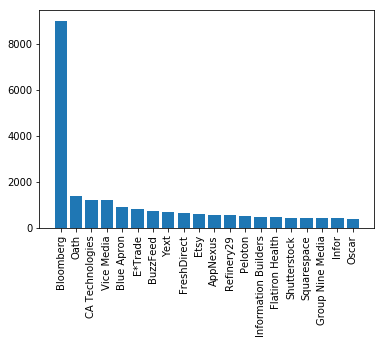

In [66]:
plt.bar(list(top_20_cmpy_df['company']), list(top_20_cmpy_df['number_of_employees']), label='company')
plt.xticks(rotation=90)
#plt.savefig('temp.png',bbox_inches='tight', pad_inches=1)

In [67]:
turnstiles_daily_stations = turnstiles_daily.sort_values('DAILY_ENTRIES', ascending=False).groupby('STATION')\
    .agg({'DAILY_ENTRIES': sum})\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .rename(columns={'DAILY_ENTRIES': 'MONTHLY_ENTRIES'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

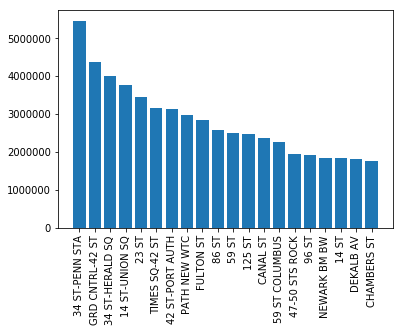

In [68]:
plt.bar(list(turnstiles_daily_stations.index)[:20],
        list(turnstiles_daily_stations.head(20)['MONTHLY_ENTRIES']), label='company')
plt.xticks(rotation=90)
#plt.savefig('temp_stations.png',bbox_inches='tight', pad_inches=1)

In [69]:
import folium
df = top_20_cmpy_df
m = folium.Map(location=[40.730610, -73.935242])

for i, row in df.iterrows():
   folium.Marker(location = row['company_coordinates'],
           popup = str('<strong>Company:  </strong> ' + row['company'] + '<br>' + '<strong>Nearest Station:  </strong> ' + row['station'] \
                       + '<br>' + '<strong>Number of Employees:  </strong>' + str(row['number_of_employees'])),

                         icon= folium.Icon(icon = 'info-sign')).add_to(m)
   folium.Marker(location = row['closest'],
                popup = str('<strong>Station:  </strong> ' + row['station']),
                icon = folium.Icon(color='red', icon='info-sign')).add_to(m)
    
m